# EDA 2

## Install Libs and Data

In [ ]:
#!pip install dash

In [ ]:
#!pip install pydeck

In [1]:
import pandas as pd
import numpy as np

In [2]:
# graph libraries for work with visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import plotly.express as px
import plotly.graph_objects as go
import pydeck as pdk

In [3]:
import folium
from folium import plugins
from folium.plugins import MousePosition

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
url1 = 'https://raw.githubusercontent.com/foxdocs/dat-bi/refs/heads/main/Data/dat-dfb.csv'

In [6]:
dfb = pd.read_csv(url1)

In [7]:
dfb.shape

(28890, 14)

In [8]:
dfb.info()

<class 'pandas.DataFrame'>
RangeIndex: 28890 entries, 0 to 28889
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         28890 non-null  str    
 1   alder[år]       28890 non-null  int64  
 2   areal[kvm]      28890 non-null  int64  
 3   grund[kvm]      27160 non-null  float64
 4   værelser[num]   28890 non-null  int64  
 5   energicat       28890 non-null  int64  
 6   liggetid[dage]  28890 non-null  int64  
 7   zipcode         28890 non-null  int64  
 8   by              28890 non-null  str    
 9   kommune         28890 non-null  str    
 10  pris[DKK]       28890 non-null  int64  
 11  region          28890 non-null  str    
 12  latitude        28890 non-null  float64
 13  longitude       28890 non-null  float64
dtypes: float64(3), int64(7), str(4)
memory usage: 4.7 MB


In [12]:
dfb.isna().sum()

address           0
alder[år]         0
areal[kvm]        0
grund[kvm]        0
værelser[num]     0
energicat         0
liggetid[dage]    0
zipcode           0
by                0
kommune           0
pris[DKK]         0
region            0
latitude          0
longitude         0
dtype: int64

In [11]:
dfb['grund[kvm]'] = dfb['grund[kvm]'].fillna(0)

In [13]:
dfb.describe()

,alder[år],areal[kvm],grund[kvm],værelser[num],energicat,liggetid[dage],zipcode,pris[DKK],latitude,longitude
count,28890.000000,28890.000000,2.889000e+04,28890.000000,28890.000000,28890.000000,28890.000000,2.889000e+04,28890.000000,28890.000000
mean,74.177501,153.740879,2.937663e+03,4.852198,566.861578,119.633056,6408.987020,3.063882e+06,55.938970,10.485317
std,46.925817,56.382587,3.467273e+04,1.617141,77.385916,124.317419,2287.978242,3.463809e+06,0.656239,1.325642
min,-2.000000,10.000000,0.000000e+00,1.000000,353.000000,0.000000,1014.000000,4.999500e+04,54.595300,8.143300
25%,49.000000,119.000000,6.860000e+02,4.000000,561.000000,33.000000,4581.000000,1.275000e+06,55.471100,9.524500
50%,63.000000,147.000000,8.450000e+02,5.000000,612.000000,89.000000,6705.000000,2.145000e+06,55.793500,10.148400
75%,97.000000,180.000000,1.155000e+03,6.000000,622.000000,160.000000,8543.000000,3.695000e+06,56.352100,11.762900
max,824.000000,1208.000000,4.119367e+06,64.000000,622.000000,995.000000,9990.000000,1.000000e+08,57.720800,15.129500


## Step 3: Explore the Data

### Categorical

In [14]:

cat_cols = dfb.select_dtypes(exclude=[np.number]).columns
cat_cols

Index(['address', 'by', 'kommune', 'region'], dtype='str')

In [15]:
cat = dfb[cat_cols]
cat.head()

,address,by,kommune,region
0,nyhusvej-5 8585 Glesborg,Glesborg,Norddjurs,Central Jutland
1,ramshoejvej-1 8940 Randers SV,Randers SV,Favrskov,Central Jutland
2,parken-12-0-th 3480 Fredensborg,Fredensborg,Fredensborg,Capital Region
3,hyltebjerg-alle-50b-0-th 2720 Vanløse,Vanløse,København,Capital Region
4,kaffevej-53-3-mf 2610 Rødovre,Rødovre,København,Capital Region


In [16]:
cat.describe()

,address,by,kommune,region
count,28890,28890,28890,28890
unique,28819,598,91,6
top,vallekildevej-70 4534 Hørve,Horsens,København,Central Jutland
freq,4,403,1176,7975


#### Regions

In [17]:
# explore individually
regs = dfb.groupby('region').size()
regs

region
Capital Region        4740
Central Jutland       7975
North Denmark         4493
Region Hovedstaden       1
South Denmark         7017
Zealand               4664
dtype: int64

<Axes: >

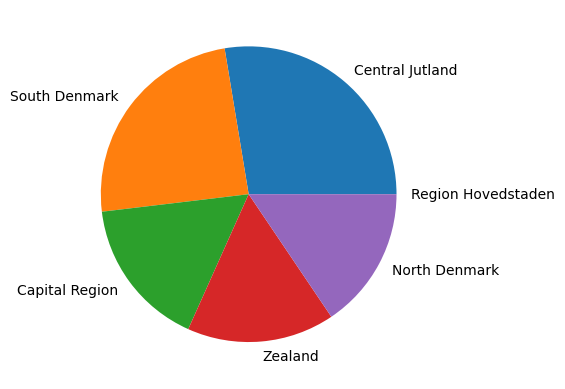

In [18]:
regs.sort_values(ascending=False).plot.pie()

#### Communes

In [19]:
kommuner = dfb.groupby('kommune').size()
kommuner

kommune
Aabenraa            252
Aalborg             725
Aarhus             1090
Albertslund         116
Allerød             377
                   ... 
Vejle               745
Vesthimmerlands     417
Viborg              424
Vordingborg         325
Ærø                  61
Length: 91, dtype: int64

<Axes: xlabel='kommune'>

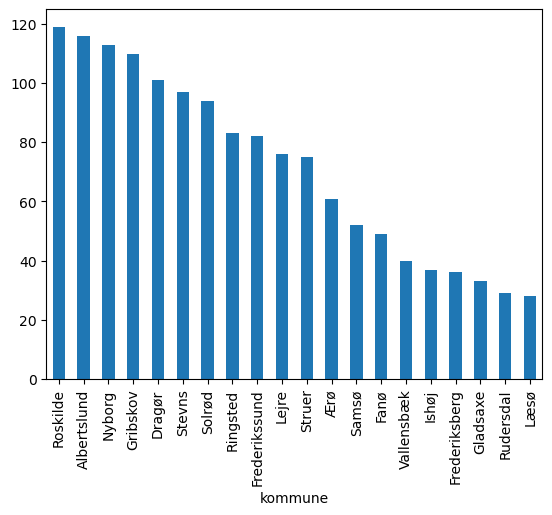

In [21]:
kommuner.sort_values(ascending=False).tail(20).plot.bar()

#### Cities

In [22]:
# explore individually
byer = dfb.groupby('by').size()
byer

by
Aabenraa        116
Aabybro          85
Aakirkeby        32
Aalborg         272
Aalborg SV       66
               ... 
Østbirk          26
Øster Assels     12
Øster Ulslev      5
Østermarie       13
Østervrå         26
Length: 598, dtype: int64

<Axes: xlabel='by'>

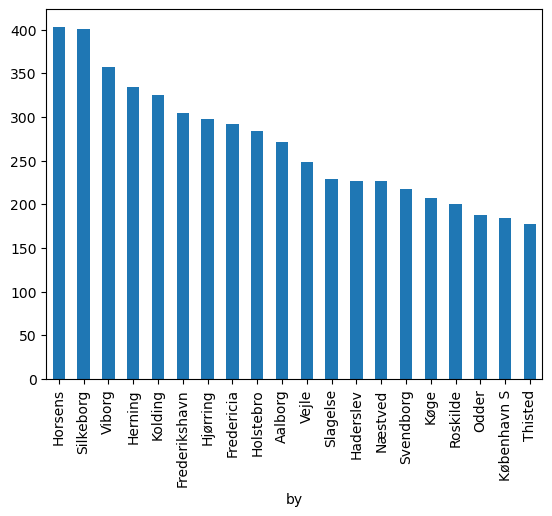

In [23]:
# number of offers per city
byer.sort_values(ascending=False).head(20).plot.bar()

In [24]:
# filter
filter = dfb['by'] == 'Roskilde'
dfb[filter]

,address,alder[år],areal[kvm],grund[kvm],værelser[num],energicat,liggetid[dage],zipcode,by,kommune,pris[DKK],region,latitude,longitude
79,aastoften-14 4000 Roskilde,57,166,760.0,4,622,1,4000,Roskilde,Høje-Taastrup,2995000,Zealand,55.6513,12.0958
184,store-graabroedrestraede-6-0 4000 Roskilde,107,83,0.0,2,622,1,4000,Roskilde,Høje-Taastrup,3775000,Zealand,55.6513,12.0958
266,sankt-mortens-vej-6 4000 Roskilde,115,147,564.0,6,612,1,4000,Roskilde,Høje-Taastrup,7495000,Zealand,55.6513,12.0958
288,gartnervang-24-0-th 4000 Roskilde,56,65,0.0,2,622,1,4000,Roskilde,Høje-Taastrup,1995000,Zealand,55.6513,12.0958
301,roskildevaenget-48-2-th 4000 Roskilde,63,76,0.0,3,622,1,4000,Roskilde,Høje-Taastrup,2095000,Zealand,55.6513,12.0958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26005,engvej-2 4000 Roskilde,177,152,533.0,5,622,174,4000,Roskilde,Høje-Taastrup,2995000,Zealand,55.6513,12.0958
26224,elmevaenget-7 4000 Roskilde,54,164,713.0,5,612,187,4000,Roskilde,Høje-Taastrup,2995000,Zealand,55.6513,12.0958
26317,soetoften-14 4000 Roskilde,50,185,814.0,5,612,194,4000,Roskilde,Høje-Taastrup,5250000,Zealand,55.6513,12.0958
26668,maagevej-12 4000 Roskilde,6,165,618.0,5,416,223,4000,Roskilde,Høje-Taastrup,6295000,Zealand,55.6513,12.0958


In [25]:
rk = dfb.groupby('region')['kommune'].count().sort_values(ascending=False)
rk.head(6)

region
Central Jutland       7975
South Denmark         7017
Capital Region        4740
Zealand               4664
North Denmark         4493
Region Hovedstaden       1
Name: kommune, dtype: int64

In [26]:
kb = dfb.groupby('kommune')['by'].count().sort_values(ascending=False)
kb.head(10)

kommune
København    1176
Aarhus       1090
Silkeborg    1027
Herning       950
Horsens       845
Esbjerg       751
Favrskov      747
Vejle         745
Aalborg       725
Odense        683
Name: by, dtype: int64

### Numerical

In [27]:
num_cols = dfb.select_dtypes(np.number).columns
num_cols

Index(['alder[år]', 'areal[kvm]', 'grund[kvm]', 'værelser[num]', 'energicat',
       'liggetid[dage]', 'zipcode', 'pris[DKK]', 'latitude', 'longitude'],
      dtype='str')

In [28]:
num = dfb[num_cols]
num

,alder[år],areal[kvm],grund[kvm],værelser[num],energicat,liggetid[dage],zipcode,pris[DKK],latitude,longitude
0,117,118,19990.0,4,622,0,8585,1995000,56.5089,10.6657
1,57,137,1060.0,5,622,0,8940,1695000,56.4358,10.0334
2,61,79,0.0,2,622,0,3480,2275000,55.9727,12.4105
3,74,69,0.0,3,622,0,2720,3500000,55.6896,12.4869
4,7,73,0.0,2,416,0,2610,3595000,55.6889,12.4510
...,...,...,...,...,...,...,...,...,...,...
28885,16,254,864.0,5,478,3,8983,2195000,56.5835,10.1393
28886,98,132,6575.0,5,467,3,7900,645000,56.8107,8.8325
28887,67,150,750.0,5,467,3,7760,425000,56.7306,8.4147
28888,69,228,1554.0,5,467,4,7600,1695000,56.4925,8.5722


In [29]:
num.head(10).style.background_gradient(cmap='Blues')

,alder[år],areal[kvm],grund[kvm],værelser[num],energicat,liggetid[dage],zipcode,pris[DKK],latitude,longitude
0,117,118,19990.000000,4,622,0,8585,1995000,56.508900,10.665700
1,57,137,1060.000000,5,622,0,8940,1695000,56.435800,10.033400
2,61,79,0.000000,2,622,0,3480,2275000,55.972700,12.410500
3,74,69,0.000000,3,622,0,2720,3500000,55.689600,12.486900
4,7,73,0.000000,2,416,0,2610,3595000,55.688900,12.451000
5,62,90,797.000000,3,612,0,8850,1095000,56.379000,9.651500
6,58,129,777.000000,4,612,0,7100,2495000,55.704200,9.524500
7,66,99,814.000000,3,612,0,5750,1495000,55.232600,10.456800
8,65,126,669.000000,3,561,0,2770,4595000,55.622700,12.609400
9,52,180,993.000000,5,622,0,7330,1795000,55.933900,9.110000


In [30]:
num.describe()

,alder[år],areal[kvm],grund[kvm],værelser[num],energicat,liggetid[dage],zipcode,pris[DKK],latitude,longitude
count,28890.000000,28890.000000,2.889000e+04,28890.000000,28890.000000,28890.000000,28890.000000,2.889000e+04,28890.000000,28890.000000
mean,74.177501,153.740879,2.937663e+03,4.852198,566.861578,119.633056,6408.987020,3.063882e+06,55.938970,10.485317
std,46.925817,56.382587,3.467273e+04,1.617141,77.385916,124.317419,2287.978242,3.463809e+06,0.656239,1.325642
min,-2.000000,10.000000,0.000000e+00,1.000000,353.000000,0.000000,1014.000000,4.999500e+04,54.595300,8.143300
25%,49.000000,119.000000,6.860000e+02,4.000000,561.000000,33.000000,4581.000000,1.275000e+06,55.471100,9.524500
50%,63.000000,147.000000,8.450000e+02,5.000000,612.000000,89.000000,6705.000000,2.145000e+06,55.793500,10.148400
75%,97.000000,180.000000,1.155000e+03,6.000000,622.000000,160.000000,8543.000000,3.695000e+06,56.352100,11.762900
max,824.000000,1208.000000,4.119367e+06,64.000000,622.000000,995.000000,9990.000000,1.000000e+08,57.720800,15.129500


In [31]:
num.describe().style.background_gradient(cmap='Blues')

,alder[år],areal[kvm],grund[kvm],værelser[num],energicat,liggetid[dage],zipcode,pris[DKK],latitude,longitude
count,28890.000000,28890.000000,28890.000000,28890.000000,28890.000000,28890.000000,28890.000000,28890.000000,28890.000000,28890.000000
mean,74.177501,153.740879,2937.663413,4.852198,566.861578,119.633056,6408.987020,3063881.856456,55.938970,10.485317
std,46.925817,56.382587,34672.726920,1.617141,77.385916,124.317419,2287.978242,3463809.339936,0.656239,1.325642
min,-2.000000,10.000000,0.000000,1.000000,353.000000,0.000000,1014.000000,49995.000000,54.595300,8.143300
25%,49.000000,119.000000,686.000000,4.000000,561.000000,33.000000,4581.000000,1275000.000000,55.471100,9.524500
50%,63.000000,147.000000,845.000000,5.000000,612.000000,89.000000,6705.000000,2145000.000000,55.793500,10.148400
75%,97.000000,180.000000,1155.000000,6.000000,622.000000,160.000000,8543.000000,3695000.000000,56.352100,11.762900
max,824.000000,1208.000000,4119367.000000,64.000000,622.000000,995.000000,9990.000000,100000000.000000,57.720800,15.129500


There are records with negative age.

In [32]:
num[num<0].count()

alder[år]         6
areal[kvm]        0
grund[kvm]        0
værelser[num]     0
energicat         0
liggetid[dage]    0
zipcode           0
pris[DKK]         0
latitude          0
longitude         0
dtype: int64

Six houses have negative age - make it zero.

In [33]:
# change the negatives with zero
num[num < 0] = 0

array([[<Axes: title={'center': 'alder[år]'}>,
        <Axes: title={'center': 'areal[kvm]'}>,
        <Axes: title={'center': 'grund[kvm]'}>],
       [<Axes: title={'center': 'værelser[num]'}>,
        <Axes: title={'center': 'energicat'}>,
        <Axes: title={'center': 'liggetid[dage]'}>],
       [<Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'pris[DKK]'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>, <Axes: >, <Axes: >]],
      dtype=object)

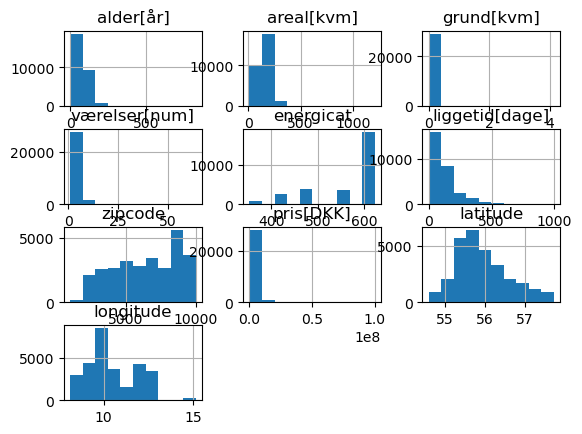

In [34]:
# check the distribution of each numeric variable
num.hist()

In [35]:
type(num['grund[kvm]'])

pandas.Series

#### Age

In [36]:
type(num['alder[år]'])

pandas.Series

In [39]:
# explore the age
years = num.groupby('alder[år]')['zipcode'].count()
years

alder[år]
0      144
1      180
2      199
3      150
4      150
      ... 
399      1
406      1
424      2
474      1
824     11
Name: zipcode, Length: 284, dtype: int64

In [40]:
years.index = years.index.map(int)

<Axes: xlabel='alder[år]'>

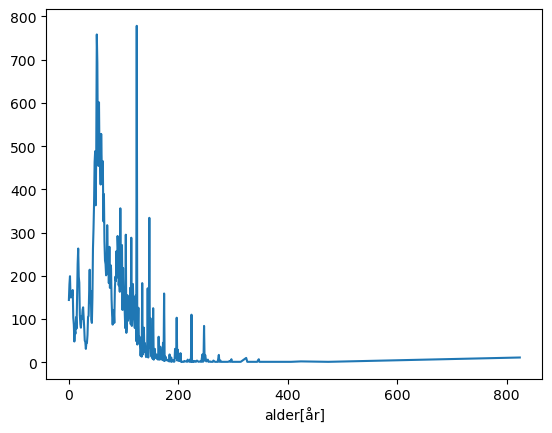

In [41]:
years.plot()

<Axes: xlabel='alder[år]'>

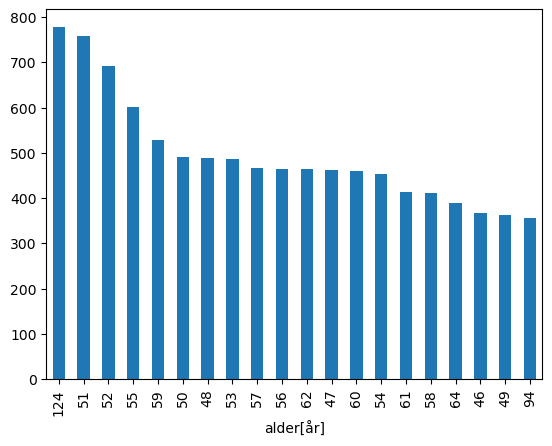

In [42]:
# number of offers per city
years.sort_values(ascending=False).head(20).plot.bar()

In [ ]:
# Seaborn
sbn.pairplot(dfb, x_vars=['areal[kvm]', 'værelser[num]', 'alder[år]'], y_vars='pris[DKK]', height=3)

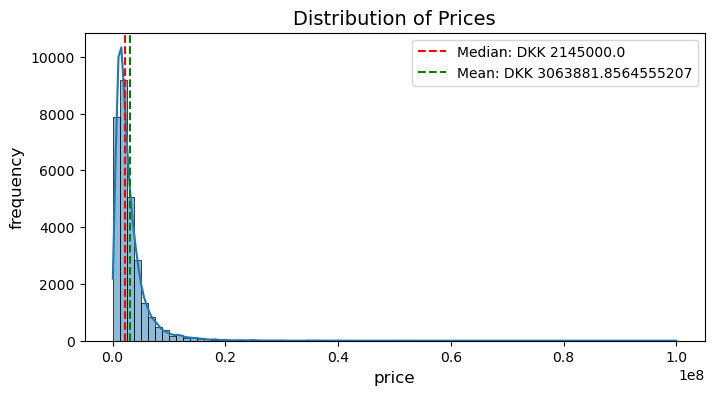

In [43]:
# Distribution of prices in a formatted diagram
plt.figure(figsize=(8, 4))
sbn.histplot(dfb['pris[DKK]'], kde=True, bins=80)
plt.title('Distribution of Prices', fontsize=14)
plt.xlabel('price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.axvline(dfb['pris[DKK]'].median(), color='red', linestyle='--', label=f'Median: DKK {dfb['pris[DKK]'].median()}')
plt.axvline(dfb['pris[DKK]'].mean(), color='green', linestyle='--', label=f'Mean: DKK {dfb['pris[DKK]'].mean()}')
plt.legend()
plt.show()



### Data Transformation

In [44]:
dfb['pris[DKK]'].mean()

np.float64(3063881.8564555207)

In [45]:
dfb['pris[DKK]'].median()

2145000.0

In [46]:
dfb['pris[DKK]'].std()

3463809.3399362494

Non-simetrical bell curve.

#### Log Transformation

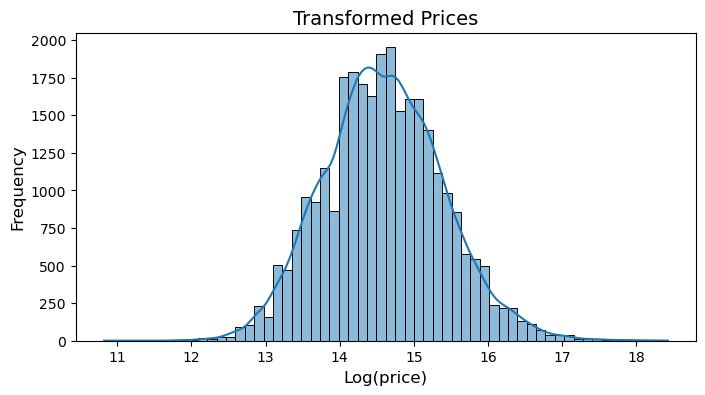

In [47]:
# Log-transformed prices to handle skewness / normal distribution
plt.figure(figsize=(8, 4))
sbn.histplot(np.log1p(dfb['pris[DKK]']), kde=True, bins=60)
plt.title('Transformed Prices', fontsize=14)
plt.xlabel('Log(price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Log-transformation is a data normalization technique that applies a logarithmic function  to data to reduce skewness, stabilize variance, and linearize non-linear relationships. It compresses large values and spreads out smaller ones, making data more symmetrical and aligned with assumptions for statistical modeling and machine learning [https://www.google.com/search?client=safari&rls=en&q=why+log-transformation&ie=UTF-8&oe=UTF-8]

In [48]:
# Apply log transformation to the data, passed as parameter
def logtrans(data):
    log_data = np.log(data)

    # plt.hist(data, bins=50, label='Original Data', color = "skyblue", alpha=0.5)
    plt.hist(log_data, bins=50, label='Log-Transformed Data', color = "orange", alpha=0.5)
    plt.legend()
    plt.show()
    return

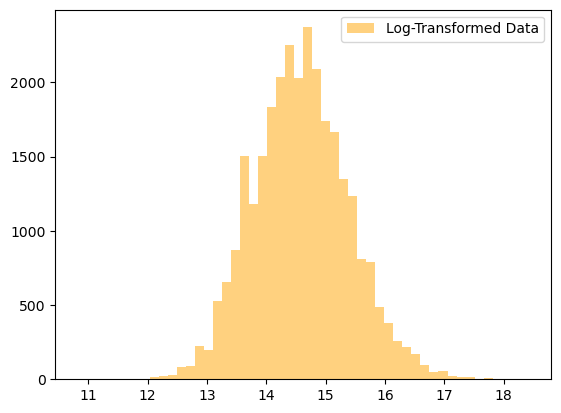

In [49]:
# function invocation
logtrans(dfb['pris[DKK]'])

We still can't compare variables, which are measured in much different scales.

#### Normalisation and Scaling

#### Min-Max Scaling / Normalisation

Transforms data to a fixed range, typically [0, 1] by mapping the min value to 0 and the max to 1 <br>
__x = (x-xmin)/(xmax-xmin)__

How does it work?

In [50]:
# manual est
def minmax(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

In [51]:
# test the function
data = np.array([10, 11, 18, 15, 20])
minmax(data)

array([0. , 0.1, 0.8, 0.5, 1. ])

Alternative way, with library function:

In [ ]:
# create a scaler instance 
minmax_scaler = MinMaxScaler()
dfb['pris[DKK]scaled'] = minmax_scaler.fit_transform(dfb[['pris[DKK]']])
dfb['pris[DKK]scaled'].describe()

In [ ]:
dfb['alder[år]scaled'] = minmax_scaler.fit_transform(dfb[['alder[år]']])
dfb['alder[år]scaled'].describe()

In [ ]:
dfb['areal[kvm]scaled'] = minmax_scaler.fit_transform(dfb[['areal[kvm]']])
dfb['areal[kvm]scaled'].describe()

In [ ]:
dfb['værelser[num]scaled'] = minmax_scaler.fit_transform(dfb[['værelser[num]']])
dfb['værelser[num]scaled'].describe()

### Removing Outliers

#### Box-Whisker Plot

In [ ]:
# comparison
plt.figure(figsize=(8, 4))
sbn.boxplot(x='region', y='pris[DKK]', data=dfb)
plt.title('Price by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


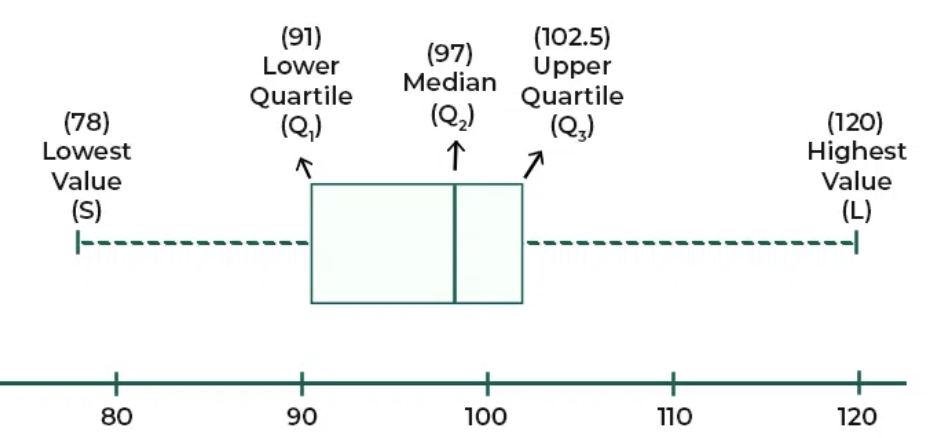

How to decide which are the outliers?

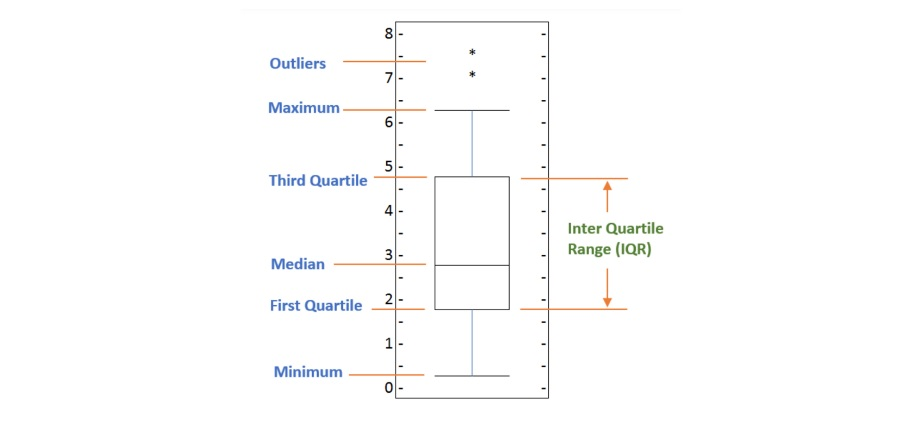

#### Inter-Quartile Range (IQR)

In [ ]:
num.describe()

In [ ]:
# outliers by inter-quartile range (IQR)
from typing import List
def remove_outliers(df, data: List, factor):
    q1 = data.quantile(.25)
    q3 = data.quantile(.75)
    IQR = q3 - q1
    # values smaller than 1.5 IQR below q1 and bigger that 1.5 IQR over q3 
    outliers = df[(data < (q1 - factor * IQR)) | (data > (q3 + factor * IQR))]
    df = df.drop(outliers.index, inplace=True)
    return df

In [ ]:
remove_outliers(dfb, dfb['værelser[num]'], 1.5)

In [ ]:
num.describe()

In [ ]:
dfb['pris[DKK]'].describe()

### Correlation

In [ ]:
dfb.columns

In [ ]:
corr = dfb.corr(method='pearson', numeric_only=True)

In [ ]:
corr

In [ ]:
# heat map
sbn.heatmap(corr, annot=True)

In [ ]:
dfb = dfb.drop(columns=['areal[kvm]', 'værelser[num]', 'alder[år]', 'pris[DKK]'])

In [ ]:
dfb.columns

### Scatter Correlation

In [ ]:
# scatter plots
from pandas.plotting import scatter_matrix

In [ ]:
num_cols = dfb.select_dtypes(include=["number"]).columns.tolist()
num_cols

In [ ]:
price_cols = dfb[['pris[DKK]scaled',	'alder[år]scaled',	'areal[kvm]scaled',	'værelser[num]scaled']]

In [ ]:
pd.plotting.scatter_matrix(price_cols, alpha=0.6)

### Interactive Geo-Mapping with Folium
[Folium](https://python-visualization.github.io/folium/latest/) is a data visualisatuion library with a support for images, video, GeoJSON and TopoJSON data formats.

In [ ]:
import folium
from folium import plugins
from folium.plugins import MousePosition

In [ ]:
url2 = 'https://raw.githubusercontent.com/foxdocs/dat-bi/refs/heads/main/Data/tab-map.csv'

In [ ]:
tabmap = pd.read_csv(url2)

In [ ]:
tabmap.head()

In [ ]:
# Lyngby
location=[55.77051, 12.51345]

In [ ]:
# create a map object and use it as background map, give central point and map style
mapa = folium.Map(location=location, tiles="OpenStreetMap", 
                  width="100%", height="100%", zoom_start=6)

In [ ]:
# see the coordinates of the mouse as you move it
MousePosition().add_to(mapa)
mapa

In [ ]:
# draw circle around Lyngby as a test demo
folium.Circle(radius=3000, location=location, popup="EK Lyngby",
              color='crimson', fill=False,).add_to(mapa)
mapa

In [ ]:
# add clusters (groups) of communes
locations = list(zip(tabmap.latitude, tabmap.longitude))
cluster = plugins.MarkerCluster(locations=locations, popups=tabmap["kommune"].tolist())  
mapa.add_child(cluster)
mapa

#### Alternative Visualisations

In [ ]:
# background map
mapa = folium.Map(location=location, tiles="OpenStreetMap",  width="100%", height="100%", zoom_start=6)

In [ ]:
# add circle markers
for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=1).add_to(mapa)
mapa

In [ ]:
# add markers for properties per zipcode
for i,row in tabmap.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  icon = folium.Icon(color="green", icon='flag'),
                  tooltip = 'Click me!',
                  popup='kommune: ' + row['kommune'] 
                      +  '<br>' 
                      + 'region: ' + row['region']
                      +  '<br>' 
                      + str(row['address']) + ' boliger'
                 ).add_to(mapa)

In [ ]:
mapa

In [ ]:
minimap = plugins.MiniMap()
mapa.add_child(minimap)

In [ ]:
# save in file
tab.to_csv("/Users/tdi/Documents/GitHub/foxdocs/dat-bi/Data/dat-dfb.csv", index=False)

In [ ]:
# save in file
tabmap.to_csv("/Users/tdi/Documents/GitHub/foxdocs/dat-bi/Data/tab-map.csv", index=False)

In [ ]:
# Create a choropleth map
folium.Choropleth(geo_data='path/to/geojson_file.geojson', data=df, columns=['area', 'value'], key_on='feature.properties.name').add_to(m)

### Geo-Visualisation with Plotly

In [ ]:
fig = px.scatter_map(tabmap, lat="latitude", lon="longitude",  size="pris[DKK]", color="address",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=30, zoom=6)
fig.update_layout(height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=True, resolution=50, scope="europe",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(projection_type="orthographic")
fig.show()

In [ ]:

fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()